# Differencing

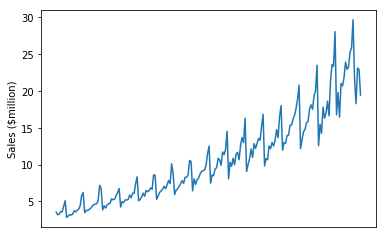

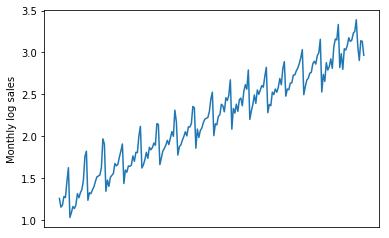

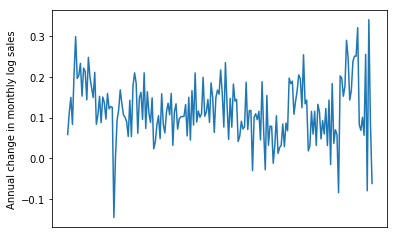

In [19]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# importing a10 data
a10 = pd.read_csv('a10.csv',sep=',',header=0,index_col=0)
fig, axes = plt.subplots()
axes.plot(a10)
axes.set_ylabel('Sales ($million)')
axes.get_xaxis().set_visible(False)

# take log
a10_log = np.log(a10)
fig, axes = plt.subplots()
axes.plot(a10_log)
axes.set_ylabel('Monthly log sales')
axes.get_xaxis().set_visible(False)

# take first-order seasonal difference
a10_log_diff = a10_log.diff(12)
fig, axes = plt.subplots()
axes.plot(a10_log_diff)
axes.set_ylabel('Annual change in monthly log sales')
axes.get_xaxis().set_visible(False)

In [18]:
combined = pd.concat([a10,a10_log,a10_log_diff],axis=1)
combined.iloc[0:15,:]

,Sales,Sales,Sales
1,3.526591,1.260332,NaN
2,3.180891,1.157161,NaN
3,3.252221,1.179338,NaN
4,3.611003,1.283986,NaN
5,3.565869,1.271408,NaN
6,4.306371,1.460096,NaN
7,5.088335,1.626951,NaN
8,2.814520,1.034792,NaN
9,2.985811,1.093871,NaN
10,3.204780,1.164643,NaN


In [26]:
#ADF test
from statsmodels.tsa.stattools import adfuller

a10_log_diff.dropna(inplace=True)
dftest = adfuller(a10_log_diff.iloc[:,0], autolag='AIC')

# format adfuller output
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
print dfoutput

Test Statistic                  -5.214559
p-value                          0.000008
#Lags Used                      11.000000
Number of Observations Used    180.000000
Critical Value (5%)             -2.877735
Critical Value (1%)             -3.467211
Critical Value (10%)            -2.575403
dtype: float64


Test statistic is less than 5% critical value, which means that we can say with 95% confidence that this is a stationary series.